<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/robot_test_arrows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Средний поворот: 0.00 градусов
Среднее изменение расстояния: 35.00 см
Поворотов налево: 0, направо: 0
Движений вперед: 3, назад: 1


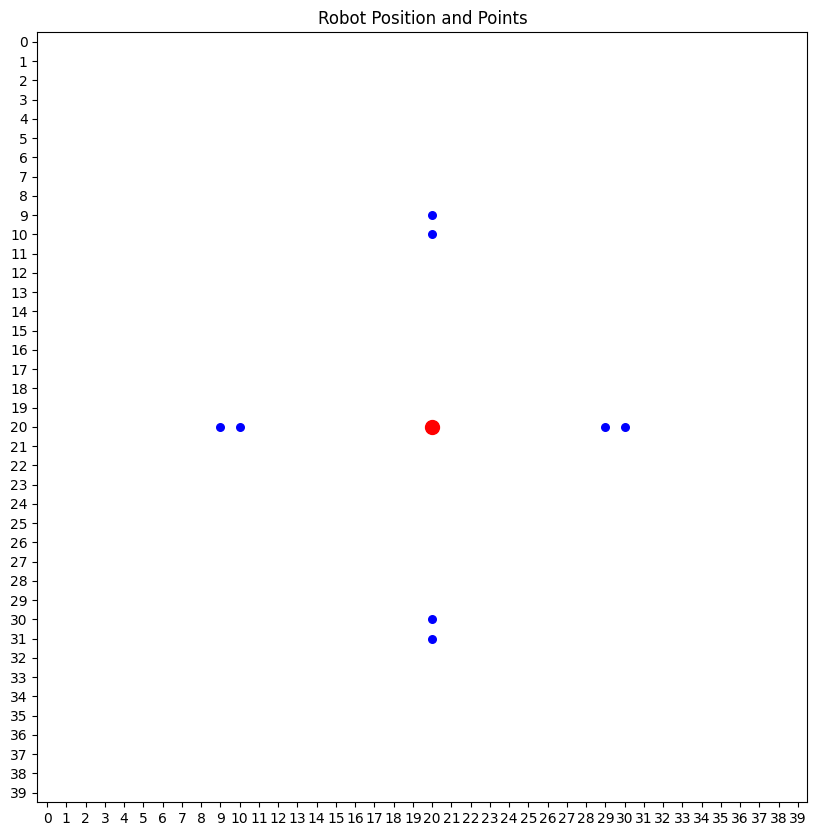

In [58]:
import numpy as np
import math
import matplotlib.pyplot as plt

# средний поворот направо
#scans = np.array([[[0, 1000], [90, 1000], [180, 1000], [270, 1000]], [[30, 1000], [120, 1000], [210, 1000], [300, 1000]]])

# средний поворот налево
#scans = np.array([[[0, 1000], [90, 1000], [180, 1000], [270, 1000]], [[330, 1000], [60, 1000], [150, 1000], [240, 1000]]])

scans = np.array([[[0, 1000], [90, 1000], [180, 1000], [270, 1000]], [[0, 900], [90, 1070], [180, 1100], [270, 1070]]])

# Параметры
scale = 100         # Масштаб: 1 клетка = 100 см
array_size = 40      # Размер массива


points = []

robot_position = (array_size // 2, array_size // 2)

for scan in scans:
    for data in scan:
        angle_radians = math.radians(data[0])

        distance_cells = data[1] / scale
        dx = distance_cells * math.cos(angle_radians)
        dy = distance_cells * math.sin(angle_radians)


        point_x = int(round(robot_position[0] + dx))
        point_y = int(round(robot_position[1] - dy))

        if 0 <= point_x < array_size and 0 <= point_y < array_size:
            points.append((point_x, point_y))


# Размер графика
plt.figure(figsize=(10, 10))

plt.scatter(*robot_position[::-1], color='red', s=100)

if points:
    x_indices, y_indices = zip(*points)
    plt.scatter(x_indices, y_indices, color='blue', s=30)

def analyze_movement_and_turns(scan1, scan2):
    total_angle_diff = 0
    total_distance_diff = 0
    count = len(scan1)

    turns_left = 0
    turns_right = 0
    moves_forward = 0
    moves_backward = 0

    for data1, data2 in zip(scan1, scan2):
        angle1 = data1[0]
        angle2 = data2[0]

        angle_diff = angle2 - angle1

        if angle_diff > 180:
            angle_diff -= 360
        elif angle_diff < -180:
            angle_diff += 360

        distance1 = data1[1]
        distance2 = data2[1]

        distance_diff = distance2 - distance1

        total_angle_diff += angle_diff
        total_distance_diff += distance_diff

        if angle_diff > 0:
            turns_right += 1
        elif angle_diff < 0:
            turns_left += 1

        if distance_diff > 0:
            moves_forward += 1
        elif distance_diff < 0:
            moves_backward += 1

    average_angle_diff = total_angle_diff / count
    average_distance_diff = total_distance_diff / count

    return average_angle_diff, average_distance_diff, turns_left, turns_right, moves_forward, moves_backward


average_angle_diff, average_distance_diff, turns_left, turns_right, moves_forward, moves_backward = analyze_movement_and_turns(scans[0], scans[1])


print(f"Средний поворот: {average_angle_diff:.2f} градусов")
print(f"Среднее изменение расстояния: {average_distance_diff:.2f} см")
print(f"Поворотов налево: {turns_left}, направо: {turns_right}")
print(f"Движений вперед: {moves_forward}, назад: {moves_backward}")


plt.xlim(-0.5, array_size - 0.5)
plt.ylim(array_size - 0.5, -0.5)
plt.xticks(range(array_size))
plt.yticks(range(array_size))
plt.grid(False)
plt.gcf().patch.set_facecolor('white')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Robot Position and Points')
plt.show()


Средний поворот: 0.00 градусов
Среднее изменение расстояния: -75.00 см
Поворотов налево: 0, направо: 0
Движений вперед: 1, назад: 3


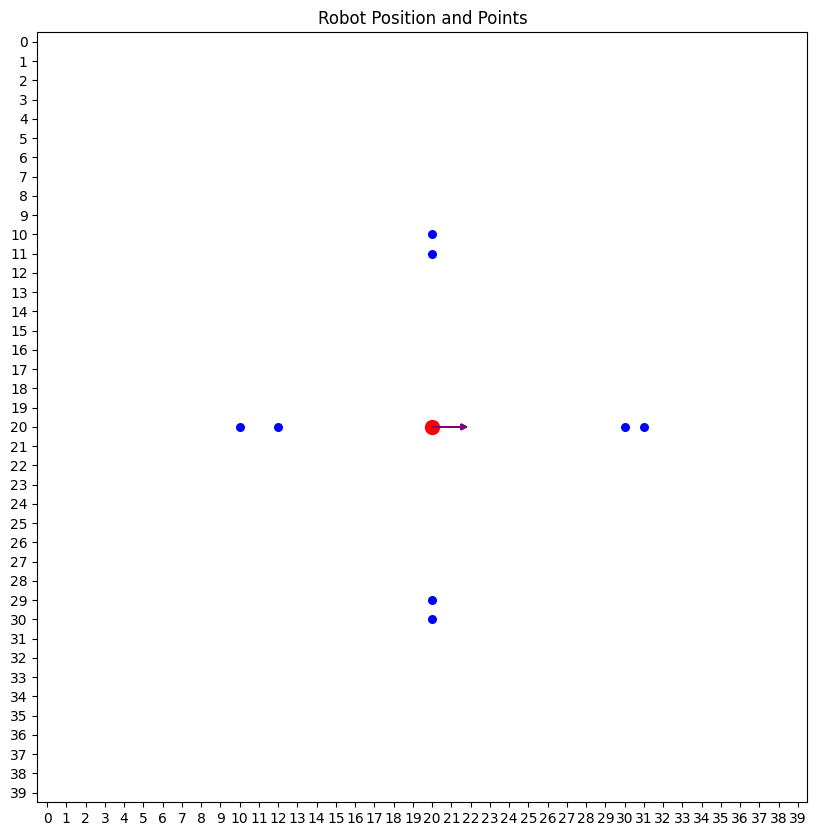

In [63]:
import numpy as np
import math
import matplotlib.pyplot as plt

# в среднем поворот направо
#scans = np.array([[[0, 1000], [90, 1000], [180, 1000], [270, 1000]], [[30, 1000], [120, 1000], [210, 1000], [300, 1000]]])

# в среднем поворот налево
#scans = np.array([[[0, 1000], [90, 1000], [180, 1000], [270, 1000]], [[330, 1000], [60, 1000], [150, 1000], [240, 1000]]])

# движение вперед
# scans = np.array([[[0, 1000], [90, 1000], [180, 1000], [270, 1000]], [[0, 900], [90, 1000], [180, 1100], [270, 1000]]])

# движение назад
scans = np.array([[[0, 1000], [90, 1000], [180, 1000], [270, 1000]], [[0, 1100], [90, 900], [180, 800], [270, 900]]])


# Параметры
scale = 100         # Масштаб: 1 клетка = 100 см
array_size = 40     # Размер массива

points = []
robot_position = (array_size // 2, array_size // 2)
initial_angle = 0   # Начальный угол робота

for scan in scans:
    for data in scan:
        angle_radians = math.radians(data[0])

        distance_cells = data[1] / scale
        dx = distance_cells * math.cos(angle_radians)
        dy = distance_cells * math.sin(angle_radians)

        point_x = int(round(robot_position[0] + dx))
        point_y = int(round(robot_position[1] - dy))

        if 0 <= point_x < array_size and 0 <= point_y < array_size:
            points.append((point_x, point_y))

# Функция для рисования стрелки
def draw_arrow(position, angle, color, label):
    arrow_length = 1.5  # Длина стрелки в клетках
    angle_radians = math.radians(angle)
    dx = arrow_length * math.cos(angle_radians)
    dy = arrow_length * math.sin(angle_radians)
    plt.arrow(position[0], position[1], dx, -dy, head_width=0.3, head_length=0.3, fc=color, ec=color, label=label)

# Размер графика
plt.figure(figsize=(10, 10))

# Рисуем робота (красная точка)
plt.scatter(*robot_position[::-1], color='red', s=100)

# Рисуем точки (синие точки)
if points:
    x_indices, y_indices = zip(*points)
    plt.scatter(x_indices, y_indices, color='blue', s=30)

# Анализ движения и поворотов
def analyze_movement_and_turns(scan1, scan2):
    total_angle_diff = 0
    total_distance_diff = 0
    count = len(scan1)

    turns_left = 0
    turns_right = 0
    moves_forward = 0
    moves_backward = 0

    for data1, data2 in zip(scan1, scan2):
        angle1 = data1[0]
        angle2 = data2[0]

        angle_diff = angle2 - angle1

        if angle_diff > 180:
            angle_diff -= 360
        elif angle_diff < -180:
            angle_diff += 360

        distance1 = data1[1]
        distance2 = data2[1]

        distance_diff = distance2 - distance1

        total_angle_diff += angle_diff
        total_distance_diff += distance_diff

        if angle_diff > 0:
            turns_right += 1
        elif angle_diff < 0:
            turns_left += 1

        if distance_diff > 0:
            moves_forward += 1
        elif distance_diff < 0:
            moves_backward += 1

    average_angle_diff = total_angle_diff / count
    average_distance_diff = total_distance_diff / count

    return average_angle_diff, average_distance_diff, turns_left, turns_right, moves_forward, moves_backward

average_angle_diff, average_distance_diff, turns_left, turns_right, moves_forward, moves_backward = analyze_movement_and_turns(scans[0], scans[1])

print(f"Средний поворот: {average_angle_diff:.2f} градусов")
print(f"Среднее изменение расстояния: {average_distance_diff:.2f} см")
print(f"Поворотов налево: {turns_left}, направо: {turns_right}")
print(f"Движений вперед: {moves_forward}, назад: {moves_backward}")

# Рисуем старую и новую стрелки направления робота
draw_arrow(robot_position[::-1], initial_angle, 'blue', 'Старая стрелка')
new_angle = initial_angle + average_angle_diff
draw_arrow(robot_position[::-1], new_angle, 'purple', 'Новая стрелка')

# Настройки графика
plt.xlim(-0.5, array_size - 0.5)
plt.ylim(array_size - 0.5, -0.5)
plt.xticks(range(array_size))
plt.yticks(range(array_size))
plt.grid(False)
plt.gcf().patch.set_facecolor('white')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Robot Position and Points')
plt.show()


Средний поворот: 30.00 градусов
Среднее изменение расстояния: 0.00 см
Поворотов налево: 0, направо: 4
Движений вперед: 0, назад: 0


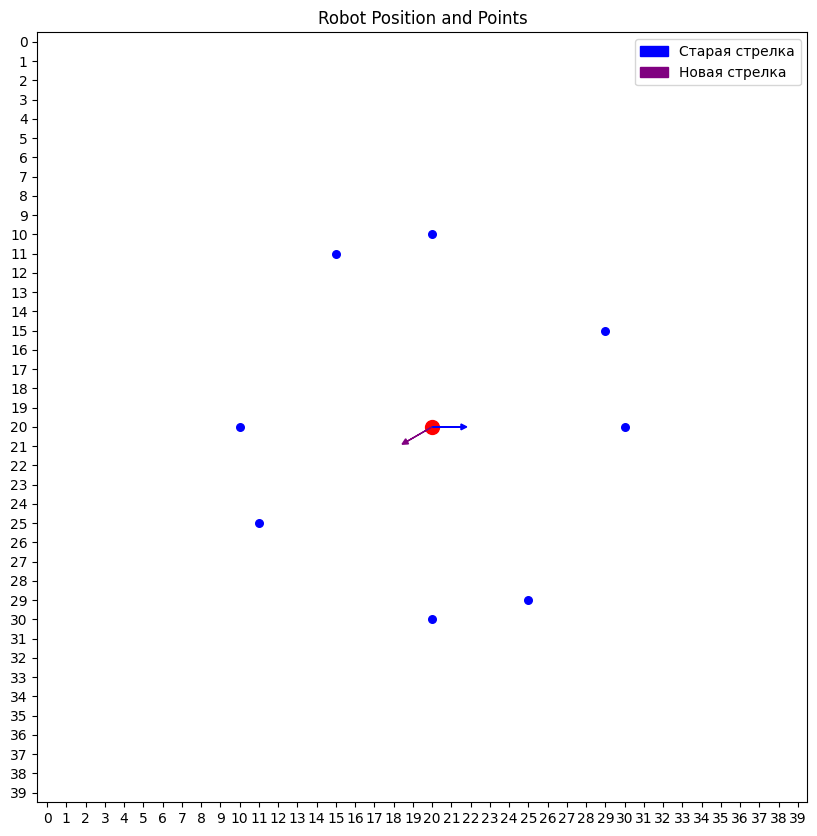

In [70]:
import numpy as np
import math
import matplotlib.pyplot as plt

# в среднем поворот направо
# scans = np.array([[[0, 1000], [90, 1000], [180, 1000], [270, 1000]], [[30, 1000], [120, 1000], [210, 1000], [300, 1000]]])

# в среднем поворот налево
# scans = np.array([[[0, 1000], [90, 1000], [180, 1000], [270, 1000]], [[330, 1000], [60, 1000], [150, 1000], [240, 1000]]])

# движение вперед
# scans = np.array([[[0, 1000], [90, 1000], [180, 1000], [270, 1000]], [[0, 900], [90, 1000], [180, 1100], [270, 1000]]])

# движение назад
# scans = np.array([[[0, 1000], [90, 1000], [180, 1000], [270, 1000]], [[0, 1100], [90, 1000], [180, 900], [270, 1000]]])

# Параметры
scale = 100         # Масштаб: 1 клетка = 100 см
array_size = 40     # Размер массива

points = []
robot_position = (array_size // 2, array_size // 2)
initial_angle = 0   # Начальный угол робота

for scan in scans:
    for data in scan:
        angle_radians = math.radians(data[0])

        distance_cells = data[1] / scale
        dx = distance_cells * math.cos(angle_radians)
        dy = distance_cells * math.sin(angle_radians)

        point_x = int(round(robot_position[0] + dx))
        point_y = int(round(robot_position[1] - dy))

        if 0 <= point_x < array_size and 0 <= point_y < array_size:
            points.append((point_x, point_y))

# Функция для рисования стрелки
def draw_arrow(position, angle, color, label):
    arrow_length = 1.5  # Длина стрелки в клетках
    angle_radians = math.radians(angle)
    dx = arrow_length * math.cos(angle_radians)
    dy = arrow_length * math.sin(angle_radians)
    plt.arrow(position[0], position[1], dx, -dy, head_width=0.3, head_length=0.3, fc=color, ec=color, label=label)

# Размер графика
plt.figure(figsize=(10, 10))

# Рисуем робота (красная точка)
plt.scatter(*robot_position[::-1], color='red', s=100)

# Рисуем точки (синие точки)
if points:
    x_indices, y_indices = zip(*points)
    plt.scatter(x_indices, y_indices, color='blue', s=30)

# Анализ движения и поворотов
def analyze_movement_and_turns(scan1, scan2):
    total_angle_diff = 0
    total_distance_diff = 0
    count = len(scan1)

    turns_left = 0
    turns_right = 0
    moves_forward = 0
    moves_backward = 0

    for data1, data2 in zip(scan1, scan2):
        angle1 = data1[0]
        angle2 = data2[0]

        angle_diff = angle2 - angle1

        if angle_diff > 180:
            angle_diff -= 360
        elif angle_diff < -180:
            angle_diff += 360

        distance1 = data1[1]
        distance2 = data2[1]

        distance_diff = distance2 - distance1

        total_angle_diff += angle_diff
        total_distance_diff += distance_diff

        if angle_diff > 0:
            turns_right += 1
        elif angle_diff < 0:
            turns_left += 1

        if distance_diff > 0:
            moves_forward += 1
        elif distance_diff < 0:
            moves_backward += 1

    average_angle_diff = total_angle_diff / count
    average_distance_diff = total_distance_diff / count

    return average_angle_diff, average_distance_diff, turns_left, turns_right, moves_forward, moves_backward

average_angle_diff, average_distance_diff, turns_left, turns_right, moves_forward, moves_backward = analyze_movement_and_turns(scans[0], scans[1])

print(f"Средний поворот: {average_angle_diff:.2f} градусов")
print(f"Среднее изменение расстояния: {average_distance_diff:.2f} см")
print(f"Поворотов налево: {turns_left}, направо: {turns_right}")
print(f"Движений вперед: {moves_forward}, назад: {moves_backward}")

# Рисуем старую и новую стрелки направления робота
draw_arrow(robot_position[::-1], initial_angle, 'blue', 'Старая стрелка')

# Учитываем движение назад: добавляем 180 градусов к начальному углу и затем среднее изменение угла
new_angle = (initial_angle + average_angle_diff + 180) % 360
draw_arrow(robot_position[::-1], new_angle, 'purple', 'Новая стрелка')

# Настройки графика
plt.xlim(-0.5, array_size - 0.5)
plt.ylim(array_size - 0.5, -0.5)
plt.xticks(range(array_size))
plt.yticks(range(array_size))
plt.grid(False)
plt.gcf().patch.set_facecolor('white')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Robot Position and Points')
plt.legend()  # Добавляем легенду для обозначения стрелок
plt.show()
